In [4]:
pip install opencv-python

Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install matplotlib

Note: you may need to restart the kernel to use updated packages.


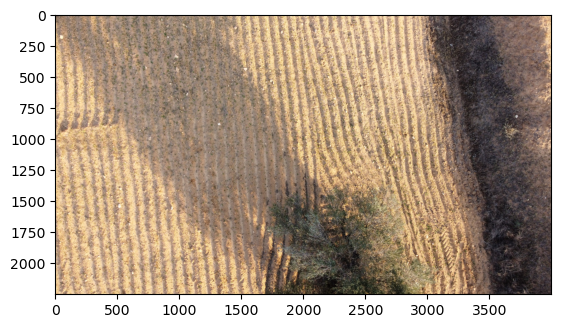

In [10]:
import cv2
from matplotlib import pyplot as plt


# Opening image
img = cv2.imread("/kaggle/input/my-data/data/DJI_0287.JPG")

# OpenCV opens images as BRG
# but we want it as RGB and
# we also need a grayscale
# version
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

# Creates the environment
# of the picture and shows it
plt.subplot(1, 1, 1)
plt.imshow(img_rgb)
plt.show()


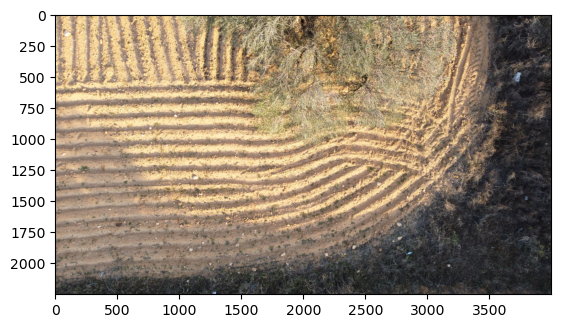

In [8]:
import cv2
from matplotlib import pyplot as plt

# Opening image
# img = cv2.imread("image.jpg")

# OpenCV opens images as BRG
# but we want it as RGB We'll
# also need a grayscale version
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)


# Use minSize because for not
# bothering with extra-small
# dots that would look like STOP signs
stop_data = cv2.CascadeClassifier('/kaggle/input/imageread1/stop_data.xml')

found = stop_data.detectMultiScale(img_gray,
								minSize =(20, 20))

# Don't do anything if there's
# no sign
amount_found = len(found)

if amount_found != 0:
	
	# There may be more than one
	# sign in the image
	for (x, y, width, height) in found:
		
		# We draw a green rectangle around
		# every recognized sign
		cv2.rectangle(img_rgb, (x, y),
					(x + height, y + width),
					(0, 255, 0), 5)
		
# Creates the environment of
# the picture and shows it
plt.subplot(1, 1, 1)
plt.imshow(img_rgb)
plt.show()


In [12]:
import os
import cv2
import numpy as np
from sklearn.cluster import KMeans

# Function to preprocess an image
def preprocess_image(image_path, target_size):
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB (OpenCV uses BGR)
    image = cv2.resize(image, target_size)  # Resize the image to the target size
    image = image / 255.0  # Normalize pixel values to the range [0, 1]
    return image

# Load data from a directory containing images of olives
data_dir = "/kaggle/input/my-data/data"
image_files = [os.path.join(data_dir, file) for file in os.listdir(data_dir)]

# Define the target size for resizing images
target_size = (100, 100)  # Example: (width, height)

# Preprocess all images and store them in a list
preprocessed_images = [preprocess_image(file, target_size) for file in image_files]

# Convert the list of images into a numpy array
image_array = np.array(preprocessed_images)

# Flatten the image array into a 1D array
image_array_flattened = image_array.reshape(image_array.shape[0], -1)

# Apply K-means clustering to group similar images
num_clusters = 3  # Choose the number of clusters you want to create
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
cluster_labels = kmeans.fit_predict(image_array_flattened)

# Print the cluster labels for each image
for i, label in enumerate(cluster_labels):
    print(f"Image {i + 1}: Cluster {label}")

# Now, the images have been clustered based on their visual similarity, without using explicit labels.


/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Image 1: Cluster 1
Image 2: Cluster 0
Image 3: Cluster 2
Image 4: Cluster 1
Image 5: Cluster 1
Image 6: Cluster 0
Image 7: Cluster 1
Image 8: Cluster 2
Image 9: Cluster 1
Image 10: Cluster 2
Image 11: Cluster 1
Image 12: Cluster 1
Image 13: Cluster 2
Image 14: Cluster 1
Image 15: Cluster 2
Image 16: Cluster 1
Image 17: Cluster 2
Image 18: Cluster 1
Image 19: Cluster 1
Image 20: Cluster 1
Image 21: Cluster 1
Image 22: Cluster 0
Image 23: Cluster 1
Image 24: Cluster 0
Image 25: Cluster 0
Image 26: Cluster 2
Image 27: Cluster 1
Image 28: Cluster 1
Image 29: Cluster 1
Image 30: Cluster 0
Image 31: Cluster 2
Image 32: Cluster 0
Image 33: Cluster 2
Image 34: Cluster 2
Image 35: Cluster 2
Image 36: Cluster 2
Image 37: Cluster 1
Image 38: Cluster 1
Image 39: Cluster 0
Image 40: Cluster 1
Image 41: Cluster 0
Image 42: Cluster 1
Image 43: Cluster 0
Image 44: Cluster 0
Image 45: Cluster 1
Image 46: Cluster 1
Image 47: Cluster 1
Image 48: Cluster 1
Image 49: Cluster 0
Image 50: Cluster 0
Image 51:

In [2]:
import os
import cv2
import numpy as np
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split

# Function to preprocess an image
def preprocess_image(image_path, target_size):
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB (OpenCV uses BGR)
    image = cv2.resize(image, target_size)  # Resize the image to the target size
    image = image / 255.0  # Normalize pixel values to the range [0, 1]
    return image

# Load data from a directory containing images of olives
data_dir = "/kaggle/input/my-data/data"
image_files = [os.path.join(data_dir, file) for file in os.listdir(data_dir)]

# Define the target size for resizing images
target_size = (100, 100)  # Example: (width, height)

# Preprocess all images and store them in a list
preprocessed_images = [preprocess_image(file, target_size) for file in image_files]

# Convert the list of images into a numpy array
image_array = np.array(preprocessed_images)

# Flatten the image array into a 1D array
image_array_flattened = image_array.reshape(image_array.shape[0], -1)

# Apply K-means clustering to group similar images
num_clusters = 3  # Choose the number of clusters you want to create
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
cluster_labels = kmeans.fit_predict(image_array_flattened)

# Split the dataset into training and testing sets based on the cluster labels
X_train, X_test, cluster_train, cluster_test = train_test_split(preprocessed_images, cluster_labels, test_size=0.2, random_state=42)

# Now, X_train and cluster_train are the training data and cluster labels, respectively.
# X_test and cluster_test are the testing data and cluster labels, respectively.
# You can use these datasets to train and evaluate your model.


/opt/conda/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [3]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models

# Create the CNN architecture
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(100, 100, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(num_clusters, activation='linear'))  # Output layer for counting

# Compile the model with the Mean Squared Error (MSE) loss function
model.compile(optimizer='adam', loss='mean_squared_error')

# Convert the cluster labels to one-hot encoding for regression
y_train = tf.keras.utils.to_categorical(cluster_train, num_clusters)
y_test = tf.keras.utils.to_categorical(cluster_test, num_clusters)

# Ensure that the number of samples matches between X_train and y_train
if len(X_train) != len(y_train):
    raise ValueError("The number of samples in X_train and y_train does not match!")

# Ensure that the number of samples matches between X_test and y_test
if len(X_test) != len(y_test):
    raise ValueError("The number of samples in X_test and y_test does not match!")

# Train the model using the training dataset
model.fit(np.array(X_train), y_train, batch_size=32, epochs=10, validation_data=(np.array(X_test), y_test))

# Now the model is trained for counting olives using cluster labels as targets.


Epoch 1/10
3/3 [==============================] - 3s 425ms/step - loss: 0.6927 - val_loss: 0.3079
Epoch 2/10
3/3 [==============================] - 1s 305ms/step - loss: 0.3471 - val_loss: 0.2901
Epoch 3/10
3/3 [==============================] - 1s 306ms/step - loss: 0.2527 - val_loss: 0.2301
Epoch 4/10
3/3 [==============================] - 1s 303ms/step - loss: 0.2313 - val_loss: 0.1816
Epoch 5/10
3/3 [==============================] - 1s 307ms/step - loss: 0.2086 - val_loss: 0.1878
Epoch 6/10
3/3 [==============================] - 1s 308ms/step - loss: 0.2007 - val_loss: 0.1673
Epoch 7/10
3/3 [==============================] - 1s 307ms/step - loss: 0.1930 - val_loss: 0.1631
Epoch 8/10
3/3 [==============================] - 1s 305ms/step - loss: 0.1839 - val_loss: 0.1498
Epoch 9/10
3/3 [==============================] - 1s 308ms/step - loss: 0.1696 - val_loss: 0.1367
Epoch 10/10
3/3 [==============================] - 1s 304ms/step - loss: 0.1494 - val_loss: 0.1197


In [9]:
import cv2
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers, models

# Assume you have already trained the model and have it stored as 'model'

# Load the testing data and cluster labels
# Replace 'X_test' and 'cluster_test' with your actual testing data and cluster labels
# Ensure that 'X_test' and 'cluster_test' have the same number of samples
X_test = np.array(X_test)
cluster_test = np.array(cluster_test)

# Evaluate the model's performance on the testing dataset
loss = model.evaluate(X_test, tf.keras.utils.to_categorical(cluster_test, num_clusters))
print("Test Loss:", loss)

# Path to the image in your directory
image_path = "/kaggle/input/my-data/data/DJI_0287.JPG"

# Read the image using OpenCV
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB (OpenCV uses BGR)

# Preprocess the image (resize and normalize)
target_size = (100, 100)  # The same target size used during training
image = cv2.resize(image, target_size)
image_preprocessed = image / 255.0  # Normalize pixel values to the range [0, 1]

# Expand dimensions to match the input shape of the model (1, 100, 100, 3)
image_preprocessed = np.expand_dims(image_preprocessed, axis=0)

# Make predictions on the image
prediction = model.predict(image_preprocessed)

# Convert the predicted probabilities into cluster labels (rounded to the nearest integer)
predicted_cluster = np.argmax(prediction, axis=1)[0]

# Now 'predicted_cluster' contains the predicted cluster label for the new image
# This represents the predicted number of olives in the image
print("Predicted Number of Olives in the Image:", predicted_cluster)


1/1 [==============================] - 0s 84ms/step - loss: 0.1197
Test Loss: 0.1196671649813652
1/1 [==============================] - 0s 98ms/step
Predicted Number of Olives in the Image: 1


In [ ]:
import cv2
import numpy as np

# Charger le modèle YOLOv3 pré-entraîné (vous devez avoir les fichiers yolov3.weights et yolov3.cfg dans le répertoire)
net = cv2.dnn.readNet("/kaggle/input/yolov3-weights/yolov3.weights", "/kaggle/input/yolov3cfg/yolov3.cfg")
classes = []
with open("coco.names", "r") as f:
    classes = [line.strip() for line in f.readlines()]
layer_names = net.getLayerNames()
output_layers = [layer_names[i[0] - 1] for i in net.getUnconnectedOutLayers()]

# Charger l'image
image = cv2.imread("/kaggle/input/my-data/data/DJI_0278.JPG")
height, width, channels = image.shape

# Prétraitement de l'image pour le modèle YOLO
blob = cv2.dnn.blobFromImage(image, 0.00392, (416, 416), (0, 0, 0), True, crop=False)

# Passer l'image prétraitée dans le réseau YOLO pour obtenir les détections
net.setInput(blob)
outs = net.forward(output_layers)

# Analyser les détections pour compter le nombre de graines d'olive
class_ids = []
confidences = []
boxes = []
for out in outs:
    for detection in out:
        scores = detection[5:]
        class_id = np.argmax(scores)
        confidence = scores[class_id]
        if confidence > 0.5:  # Seuil de confiance pour filtrer les détections faibles
            center_x = int(detection[0] * width)
            center_y = int(detection[1] * height)
            w = int(detection[2] * width)
            h = int(detection[3] * height)

            # Coordonnées du rectangle autour de la détection
            x = int(center_x - w / 2)
            y = int(center_y - h / 2)

            boxes.append([x, y, w, h])
            confidences.append(float(confidence))
            class_ids.append(class_id)

# Suppression des détections multiples et faibles en utilisant la non-maximum suppression
indexes = cv2.dnn.NMSBoxes(boxes, confidences, 0.5, 0.4)

# Compter le nombre de graines d'olive détectées
num_graines_olive = len(indexes)

# Dessiner les rectangles autour des détections dans l'image
for i in range(len(boxes)):
    if i in indexes:
        x, y, w, h = boxes[i]
        label = classes[class_ids[i]]
        cv2.rectangle(image, (x, y), (x + w, y + h), (0, 255, 0), 2)
        cv2.putText(image, label, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 255, 0), 2)

# Afficher le résultat et le nombre de graines d'olive détectées
cv2.imshow("Detection d'objets", image)
print("Nombre de graines d'olive détectées:", num_graines_olive)
cv2.waitKey(0)
cv2.destroyAllWindows()
